In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
fpath_csv = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_6836/datasets/MSFTPrices.csv'
# Read in the csv file and parse dates
StockPrices = pd.read_csv(fpath_csv, parse_dates=['Date'])
# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')
# display only the first five rows of StockPrices
display(StockPrices.head(5))

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


,Date,Open,High,Low,Close,Volume,Adjusted,Returns
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


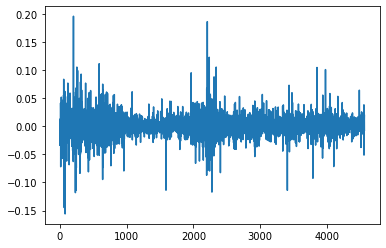

In [5]:
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
# Check the first five rows of StockPrices
display(StockPrices.head(5))
# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()

In [6]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']* 100
returns_plot = percent_return.dropna()
returns_plot

1      -3.377986
2       1.054377
3      -3.349818
4       1.306813
5       0.729077
          ...   
4556    1.077340
4557    0.785375
4558    1.565814
4559    2.037227
4560   -0.712286
Name: Returns, Length: 4560, dtype: float64

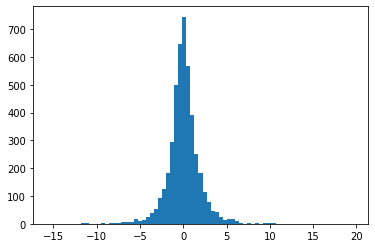

In [7]:
plt.hist(returns_plot, 75)
plt.show()

In [8]:
# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
display(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
display(mean_return_annualized)

0.00037777546435757676

0.09985839482852632

In [9]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
display(sigma_daily)

# Calculate the daily variance
variance_daily = np.var(StockPrices['Returns'])
display(variance_daily)

0.019341100408708317

0.00037407816501973704

In [10]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
display(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
display(variance_annualized)

0.3070304505826315

0.09426769758497373

## 偏离度(**SKENWNESS**)

$$
        g_1=\frac{m_3}{m_2^{3/2}}
$$
$$
        m_i=\frac{1}{N}\sum_{n=1}^N(x[n]-\bar{x})^i
$$

## Formula
![Formula](https://www.gstatic.com/education/formulas2/472522532/en/skewness.svg)

[Reference](https://en.wikipedia.org/wiki/Skewness)

In [11]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
display(returns_skewness)

0.21935459193067805

## Kurtosis(峰度)

## Formulation

![formula](https://www.gstatic.com/education/formulas2/472522532/en/kurtosis.svg)

[Reference](https://en.wikipedia.org/wiki/Kurtosis)

In [12]:
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
display(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis +3
display(fourth_moment)

10.314572618025519

13.314572618025519

## Shapiro–Wilk test

[Reference](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

In [13]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
display("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
display("P-value: ", p_value)

'Shapiro results:'

ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)

'P-value: '

0.0

In [14]:
StockReturns = pd.read_csv('data/sr.csv',parse_dates=['Date'],usecols=[0,1,2,3,4,5,6,7,8,9])
StockReturns.set_index(['Date'],inplace=True)

StockReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585
...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543
2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082
2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352


## Calculating portfolio returns

组合收益= sum(权重* 收益率)

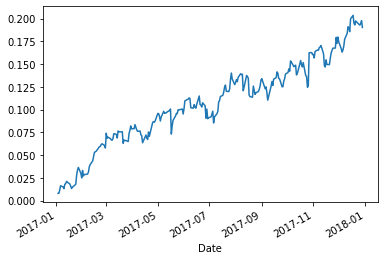

In [15]:
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [16]:
def cumulative_returns_plot(cols):
    CumulativeReturns = ((1+StockReturns[cols]).cumprod()-1)
    CumulativeReturns.plot()
    plt.show()

## Equal weighted portfolios

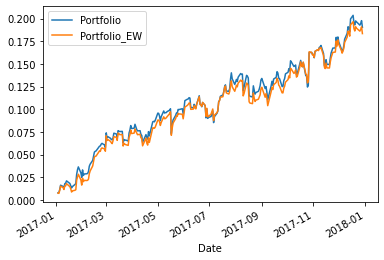

In [17]:
# How many stocks are in your portfolio?
numstocks = 9
# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

## Market-cap weighted portfolios

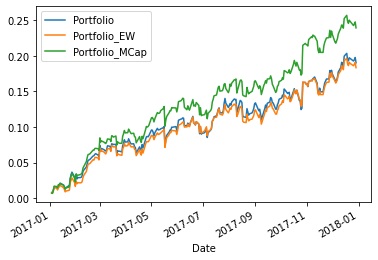

In [18]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = (market_capitalizations)/market_capitalizations.sum()

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

# Correlation and co-variance

## Pearson correlation


In [19]:
# Calculate the correlation matrix
columns = ['AAPL','MSFT','XOM','JNJ','JPM','AMZN', 'GE','FB','T']
StockReturn = StockReturns[columns].copy()
correlation_matrix = StockReturn.corr()

# display the correlation matrix
display(correlation_matrix)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,1.000000,0.437430,0.055505,0.038432,0.199914,0.509472,0.006766,0.542367,0.005082
MSFT,0.437430,1.000000,0.084108,0.230215,0.191248,0.621096,-0.044827,0.543341,-0.021079
XOM,0.055505,0.084108,1.000000,0.121012,0.305926,0.015118,0.193861,-0.046813,0.197576
JNJ,0.038432,0.230215,0.121012,1.000000,0.070328,0.052781,0.067930,0.079391,0.091622
JPM,0.199914,0.191248,0.305926,0.070328,1.000000,0.013919,0.257401,0.095245,0.252832
AMZN,0.509472,0.621096,0.015118,0.052781,0.013919,1.000000,-0.092188,0.653030,-0.017909
GE,0.006766,-0.044827,0.193861,0.067930,0.257401,-0.092188,1.000000,-0.024364,0.292706
FB,0.542367,0.543341,-0.046813,0.079391,0.095245,0.653030,-0.024364,1.000000,-0.024505
T,0.005082,-0.021079,0.197576,0.091622,0.252832,-0.017909,0.292706,-0.024505,1.000000


# The correlation matrix

The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. You can use the built-in .corr() method on a pandas DataFrame to easily calculate the correlation matrix.

Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, because a stock always has a perfect correlation with itself. The matrix is symmetric, which means that the lower triangle and upper triangle of the matrix are simply reflections of each other since correlation is a bi-directional measurement.

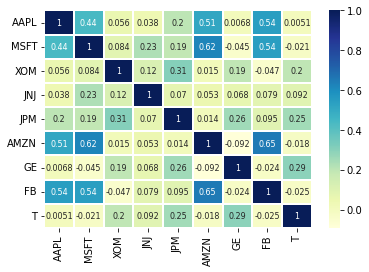

In [20]:
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [21]:
# Calculate the covariance matrix
cov_mat = StockReturn.cov()
# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252
# Print the annualized co-variance matrix
display(cov_mat_annual)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833



## Portfolio standard deviation
The formula for portfolio volatility is:
$$
\sigma_{Portfolio} = \sqrt{ w_T \cdot \Sigma \cdot w }
$$
- $\sigma_{Portfolio}$: Portfolio volatility
- $\sigma $ : Covariance matrix of returns
- w: Portfolio weights ( is transposed portfolio weights)
-  The dot-multiplication operator

In [22]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931417642713795


# Sharpe ratios

The Sharpe ratio is a simple metric of risk adjusted return which was pioneered by William F. Sharpe. Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return. In finance, you are always seeking ways to improve your Sharpe ratio, and the measure is very commonly quoted and used to compare investment strategies.

## Formula

The original 1966 Sharpe ratio calculation is quite simple:
$$
S = \frac{ R_a - r_f }{\sigma_a}
$$
- S: Sharpe Ratio
- $R_a$: Asset return
- $r_f$: Risk-free rate of return
- $\sigma_a$: Asset volatility

In [23]:
# Risk free rate
risk_free = 0
RandomPortfolios = pd.read_csv('data/rp.csv',)
# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns']- risk_free)/RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


# MSR portfolio

The maximum Sharpe ratio, or MSR portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.

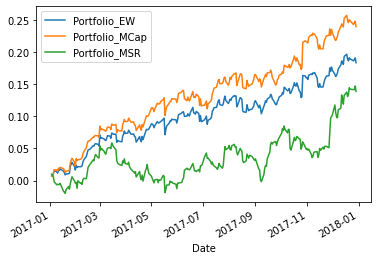

In [24]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR'])

# The GMV portfolio
The global minimum volatility portfolio, or GMV portfolio, is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk leve


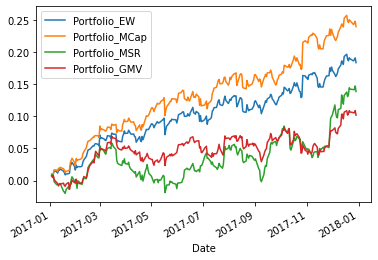

In [25]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])

# Factor Investing
In order to perform a robust analysis on your portfolio returns, you must first subtract the risk-free rate of return from your portfolio returns. The portfolio return minus the risk-free rate of return is known as the Excess Portfolio Return.

In the United States, the risk-free rate has been close to 0 since the financial crisis (2008), but this step is crucial for other countries with higher risk-free rates such as Venezuela or Brazil.

The FamaFrenchData DataFrame is available in your workspace and contains the proper data for this exercise. The portfolio you will be working with is the equal-weighted portfolio from Chapter 2.

In [26]:
FamaFrenchData = pd.read_csv('data/ff.csv', parse_dates=['Date'])

FamaFrenchData.set_index('Date',inplace=True)
FamaFrenchData

,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.000025
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.000025
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.000025
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.000025
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.000025
...,...,...,...,...,...,...,...
2017-12-22,-0.001360,-0.0007,-0.0019,-0.0020,-0.0005,0.0021,0.000065
2017-12-26,-0.002715,-0.0007,0.0031,-0.0006,-0.0017,0.0056,0.000065
2017-12-27,0.001651,0.0005,-0.0016,-0.0019,0.0006,-0.0012,0.000065


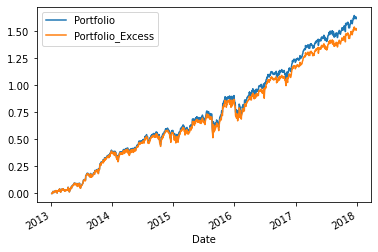

In [27]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio']-FamaFrenchData['RF']

# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

# Calculating beta using co-variance

$$
\beta_P = \frac{Cov(R_P, R_B)}{Var(R_B)}
$$

- $\beta_P$: Portfolio beta
- $Cov(R_P, R_B)$: The co-variance between the portfolio (P) and the benchmark market index (B)
- $Var(R_B)$: The variance of the benchmark market index

In [28]:
FamaFrenchData[['Portfolio_Excess', 'Market_Excess']]

,Portfolio_Excess,Market_Excess
Date,,
2013-01-03,-0.005091,-0.0014
2013-01-04,0.003999,0.0055
2013-01-07,0.004396,-0.0031
2013-01-08,-0.004684,-0.0027
2013-01-09,0.004611,0.0034
...,...,...
2017-12-22,-0.001425,-0.0007
2017-12-26,-0.002780,-0.0007
2017-12-27,0.001586,0.0005


In [29]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
display(covariance_matrix)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
display(benchmark_variance)

portfolio_beta = covariance_coefficient/benchmark_variance
display(portfolio_beta)


,Portfolio_Excess,Market_Excess
Portfolio_Excess,0.000070,0.000057
Market_Excess,0.000057,0.000059


5.880335088211895e-05

0.9737755165745461

## Implement

协方差/方差  = 二元最小二乘法
cov/var =  polyfit()

In [30]:
k, v = np.polyfit(FamaFrenchData['Market_Excess'],FamaFrenchData['Portfolio_Excess'],1)
print(k,v)


0.9737755165745446 0.00019084481217753726


# Calculating beta with CAPM

$$
E(R_{P}) - RF = \beta_{{P}}(E(R_{M})-RF)\
$$

- $E(R_{P}) - RF$: The excess expected return of a stock or portfolio P
- $E(R_{M}) - RF$: The excess expected return of the broad market portfolio B
- $RF$: The regional risk free-rate
- $\beta_{{P}}$: Portfolio beta, or exposure, to the broad market portfolio B

In [31]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
# print(CAPM_fit.params)
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.7942627160017839
0.9737755165745441


# The Fama French 3-factor model

The Fama-French model famously adds two additional factors to the CAPM model to describe asset returns:
$$
R_{P} = RF + \beta_{M}(R_{M}-RF)+b_{SMB} \cdot SMB + b_{HML} \cdot HML + \alpha
$$
- SMB: The small minus big factor
- $b_{SMB}$: Exposure to the SMB factor
- HML: The high minus low factor
- $b_{HML}$: Exposure to the HML factor
- $\alpha$: Performance which is unexplained by any other factors
- $\beta_{M}$: Beta to the broad market portfolio B

In [32]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess+SMB+HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585152


# p-values and coefficients

In [33]:
FamaFrench_fit.params['SMB']

-0.26215152743192593

In [34]:
FamaFrench_fit.pvalues['SMB']

1.5200513481256368e-33

You can use the .pvalues attribute on a fitted smf.ols regression model to retrieve the p-values for each coefficient.

Normally, p-values less than 0.05 are considered statistically significant.

Coefficients can be extracted from the fitted regression object using the .params attribute.

In [35]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.26215152743192593  and is  significant


In the Fama-French factor model:

- The HML factor is constructed by calculating the return of growth stocks, or stocks with high valuations, versus the return of value stocks.
- The SMB factor is constructed by calculating the return of small-cap stocks, or stocks with small market capitalizations, versus the return of large-cap stocks.


> Small-cap + Value stocks should have the highest returns and risk

# The efficient market and alpha

- The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the Efficient Market Hypothesis.
- There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but investors should seek to maximize their alpha.

In [36]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params["Intercept"]
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
print(portfolio_alpha_annualized)

0.00015826665203183115
0.040685926598063915


- **RMW**: Profitability
- **CMA**: Investment

In [37]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW+ CMA ', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225792


| Model                | Adjusted R-Squared |
|----------------------|--------------------|
| CAPM                 | 0.7943             |
| Fama-French 3 Factor | 0.8194             |
| Fama-French 5 Factor | 0.8367             |

# Historical drawdown

$$
\text{Drawdown} = \frac{r_t}{RM} - 1
$$

- $r_t$: Cumulative return at time t
- $RM$: Running maximum

In [38]:
cum_rets = pd.read_csv('data/cr.csv', parse_dates=['Date'])
cum_rets.set_index('Date',inplace=True)
cum_rets.head(5)

,USO
Date,
2007-01-03,0.957364
2007-01-04,0.918411
2007-01-05,0.926938
2007-01-08,0.920349
2007-01-09,0.916667


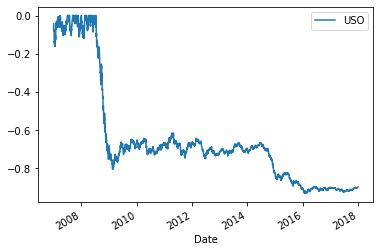

In [39]:
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)
# Ensure the value never drops below 1
running_max[running_max<1] = 1
# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1

# Plot the results
drawdown.plot()
plt.show()

In [40]:
drawdown

,USO
Date,
2007-01-03,-0.042636
2007-01-04,-0.081589
2007-01-05,-0.073062
2007-01-08,-0.079651
2007-01-09,-0.083333
...,...
2017-12-22,-0.900749
2017-12-26,-0.898281
2017-12-27,-0.898536


In [41]:
StockReturns_perc = pd.read_csv('data/sp.csv', parse_dates=['Date'])
StockReturns_perc.set_index('Date',inplace=True)
StockReturns_perc = StockReturns_perc.squeeze()
StockReturns_perc

Date
2007-01-03   -4.263558
2007-01-04   -4.068832
2007-01-05    0.928472
2007-01-08   -0.710851
2007-01-09   -0.400091
                ...   
2017-12-22    0.171821
2017-12-26    2.487136
2017-12-27   -0.251046
2017-12-28    0.419463
2017-12-29    0.334169
Name: USO, Length: 2769, dtype: float64

-3.608233764037496


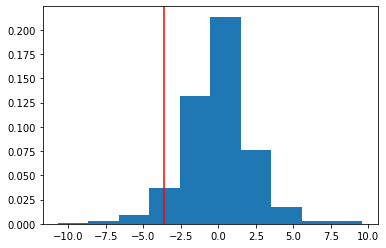

In [42]:
# Calculate historical VaR(95)
var_95 = np.percentile(StockReturns_perc, 5)
print(var_95)
# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)
# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, stacked=True)
# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

-5.054143158346777


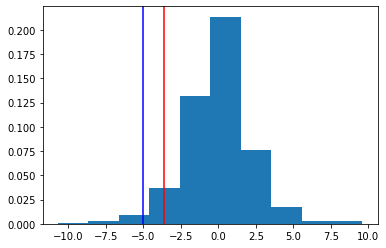

In [43]:
# Historical CVaR 95
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean()
print(cvar_95)

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

# Changing VaR and CVaR quantiles

In [44]:
# Historical VaR(90) quantiles
var_90 = np.percentile(StockReturns_perc, 10)
print(var_90)

# Historical CVaR(90) quantiles
cvar_90 = StockReturns_perc[StockReturns_perc <= var_90].mean()
print(cvar_90)


-2.558512646965176
-4.043186770518807


In [45]:
# Historical VaR(99) quantiles
var_99 = np.percentile(StockReturns_perc, 1)
print(var_99)

# Historical CVaR(99) quantiles
cvar_99 = StockReturns_perc[StockReturns_perc <= var_99].mean()
print(cvar_99)

-6.012059532883854
-7.422253935689953


In [46]:

def plot_hist():
  plt.hist(sorted_rets, density=True, stacked=True)
  # Charting parameters
  plt.xlabel('Returns (%)')
  plt.ylabel('Probability')
  plt.title('Historical Distribution of USO Returns', fontsize=18, fontweight='bold')
  plt.axvline(x=var_90, color='r', linestyle='-', label="VaR 90: {0:.2f}%".format(var_90))
  plt.axvline(x=var_95, color='g', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
  plt.axvline(x=var_99, color='b', linestyle='-', label="VaR 99: {0:.2f}%".format(var_99))
  plt.axvline(x=cvar_90, color='r', linestyle='--', label="CVaR 90: {0:.2f}%".format(cvar_90))
  plt.axvline(x=cvar_95, color='g', linestyle='--', label="CVaR 95: {0:.2f}%".format(cvar_95))
  plt.axvline(x=cvar_99, color='b', linestyle='--', label="CVaR 99: {0:.2f}%".format(cvar_99))
  plt.legend(loc='upper right')
  plt.show()

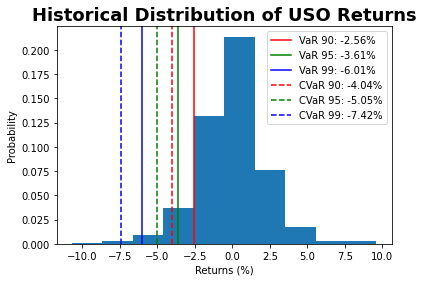

In [47]:
plot_hist()


# Parametric VaR

In [49]:
StockReturns = pd.read_csv('data/spr.csv', parse_dates=['Date'])
StockReturns.set_index('Date',inplace=True)
StockReturns = StockReturns.squeeze()
StockReturns

Date
2007-01-03   -0.042636
2007-01-04   -0.040688
2007-01-05    0.009285
2007-01-08   -0.007109
2007-01-09   -0.004001
                ...   
2017-12-22    0.001718
2017-12-26    0.024871
2017-12-27   -0.002510
2017-12-28    0.004195
2017-12-29    0.003342
Name: USO, Length: 2769, dtype: float64

In [50]:
# Import norm from scipy.stats
from scipy.stats import norm

# Estimate the average daily return
mu = np.mean(StockReturns)

# Estimate the daily volatility
vol = np.std(StockReturns)

# Set the VaR confidence level
confidence_level = 0.05

# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level, mu, vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95))

Mean:  -0.00028638956240214787 
Volatility:  0.021888087129708852 
VaR(95):  -0.03628908906473361


# Scaling risk estimates
$$
\text{VaR(95)}_{\text{t days}} = \text{VaR(95)}_{\text{1 day}} * \sqrt{t}
$$

In [51]:
# Aggregate forecasted VaR
forecasted_values = np.empty([100, 2])

# Loop through each forecast period
for i in range(100):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = np.sqrt(i+1)* var_95

In [52]:
def plot_var_scale():
  # Plot the forecased vs time
  plt.plot(forecasted_values[:,0], -1*forecasted_values[:,1])
  plt.xlabel('Time Horizon T+i')
  plt.ylabel('Forecasted VaR 95 (%)')
  plt.title('VaR 95 Scaled by Time', fontsize=18, fontweight='bold')
  plt.show()

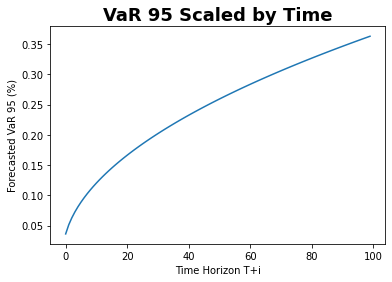

In [53]:
# Plot the results
plot_var_scale()

# A random walk simulation

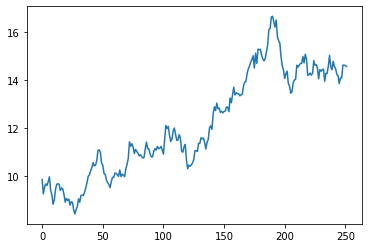

In [57]:
# Set the simulation parameters
mu = np.mean(StockReturns)
vol = np.std(StockReturns)
T = 252
S0 = 10

# Add one to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1

# Forecasted random walk
forecasted_values = rand_rets.cumprod() * S0

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

# Monte Carlo simulations

**Monte-Carlo simulations** are used to model a wide range of possibilities.

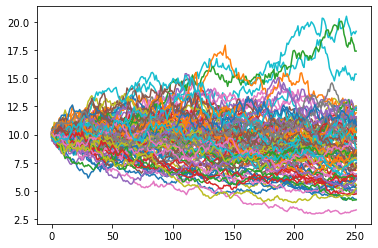

In [58]:
# Loop through 100 simulations
for i in range(100):
    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    # Plot the Monte Carlo path
    plt.plot(range(0, T), forecasted_values)

# Show the simulations
plt.show()

# Monte Carlo VaR

Both the return values and the Monte-Carlo paths can be used for analysis of everything ranging from option pricing models and hedging to portfolio optimization and trading strategies.

In [62]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):
    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.17 %
